# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
import seaborn as sns #importing data visualization libraries
import matplotlib.pyplot as plt

#  Load Data

In [ ]:
#data = pd.read_csv("Online Retail.csv",encoding= 'unicode_escape')
data = pd.read_csv("/content/drive/MyDrive/OnlineRetail.csv",encoding= 'unicode_escape')

In [ ]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011,4.15,12680,France,16.60


# Data Statistics

In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010,3.39,17850,United Kingdom,20.34


In [ ]:
data.describe()

,Quantity,UnitPrice,CustomerID,Sales
count,541909.000000,541909.000000,541909.000000,541909.000000
mean,9.552250,4.611114,15287.518434,17.987795
std,218.081158,96.759853,1484.746041,378.810824
min,-80995.000000,-11062.060000,12346.000000,-168469.600000
25%,1.000000,1.250000,14367.000000,3.400000
50%,3.000000,2.080000,15287.000000,9.750000
75%,10.000000,4.130000,16255.000000,17.400000
max,80995.000000,38970.000000,18287.000000,168469.600000


# Drop Nan

In [ ]:
data.dropna()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011,4.15,12680,France,16.60


In [ ]:
data.Quantity.astype(int)
data.UnitPrice.astype(int)
data.Sales.astype(int)
data.CustomerID.astype(int)

0         17850
1         17850
2         17850
3         17850
4         17850
          ...  
541904    12680
541905    12680
541906    12680
541907    12680
541908    12680
Name: CustomerID, Length: 541909, dtype: int64

In [ ]:
data.isna().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
Sales             0
dtype: int64

In [ ]:
#checking the Null values in the dataset
data.isnull().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
Sales             0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   541909 non-null  int64  
 7   Country      541909 non-null  object 
 8   Sales        541909 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 37.2+ MB


In [ ]:
data0 = data[['Quantity','UnitPrice','CustomerID','Sales']]
data0[data0 < 0] = 0

<ipython-input-13-f03609f25d81>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data0[data0 < 0] = 0
<ipython-input-13-f03609f25d81>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data0[data0 < 0] = 0


# Countplot of Country Occurances

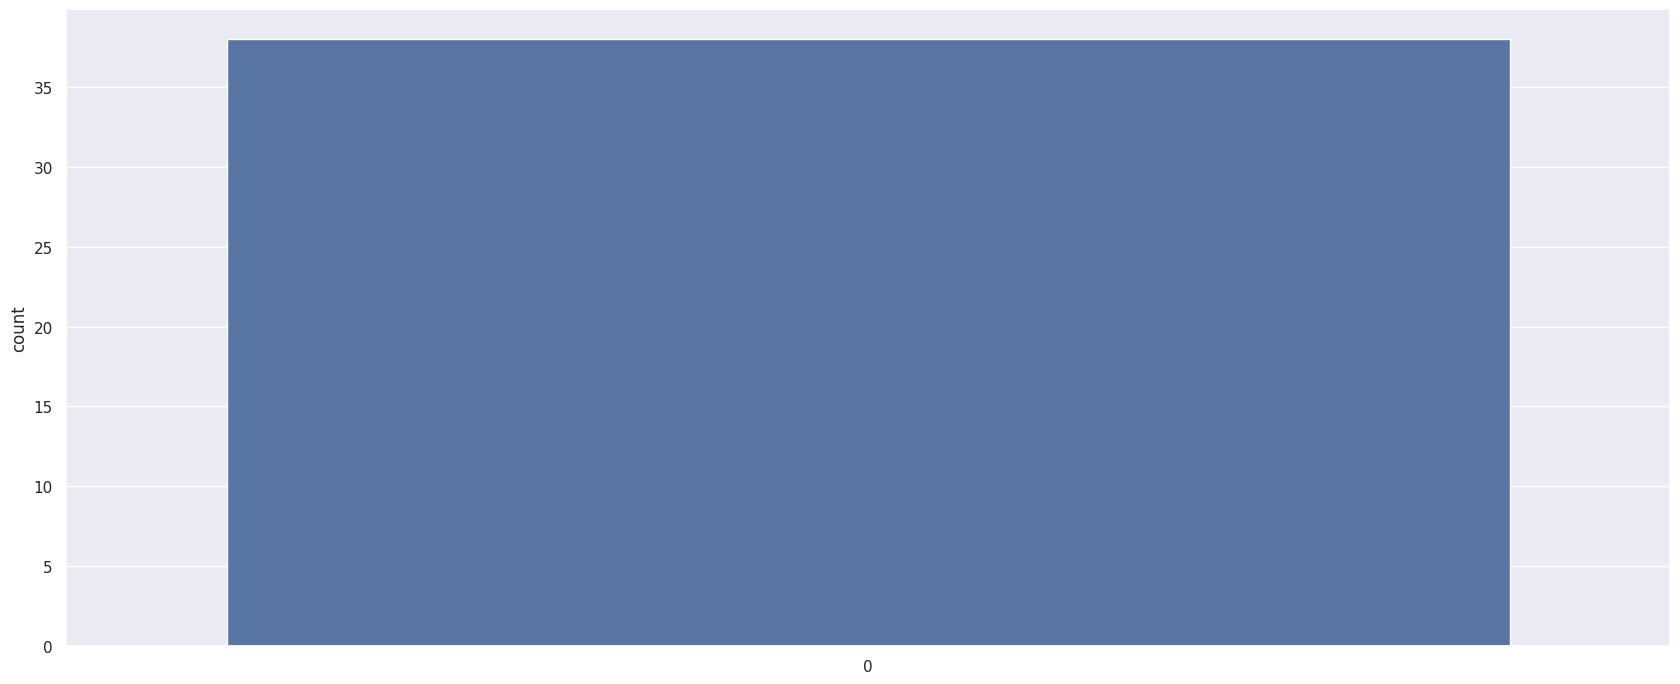

In [ ]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.countplot(data['Country'].value_counts());

# Country Vs #CustomerID

In [ ]:
data.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False)

Country
United Kingdom          3950
Germany                   95
France                    88
Spain                     31
Belgium                   25
Switzerland               22
Portugal                  20
Italy                     15
Finland                   12
Austria                   11
Norway                    10
Netherlands                9
Australia                  9
Denmark                    9
Channel Islands            9
Cyprus                     8
Sweden                     8
Japan                      8
Poland                     6
Unspecified                5
Israel                     5
EIRE                       4
USA                        4
Greece                     4
Canada                     4
Bahrain                    3
Malta                      2
United Arab Emirates       2
Singapore                  1
Brazil                     1
Saudi Arabia               1
Lebanon                    1
RSA                        1
Hong Kong                  1
Icelan

<Axes: xlabel='Country'>

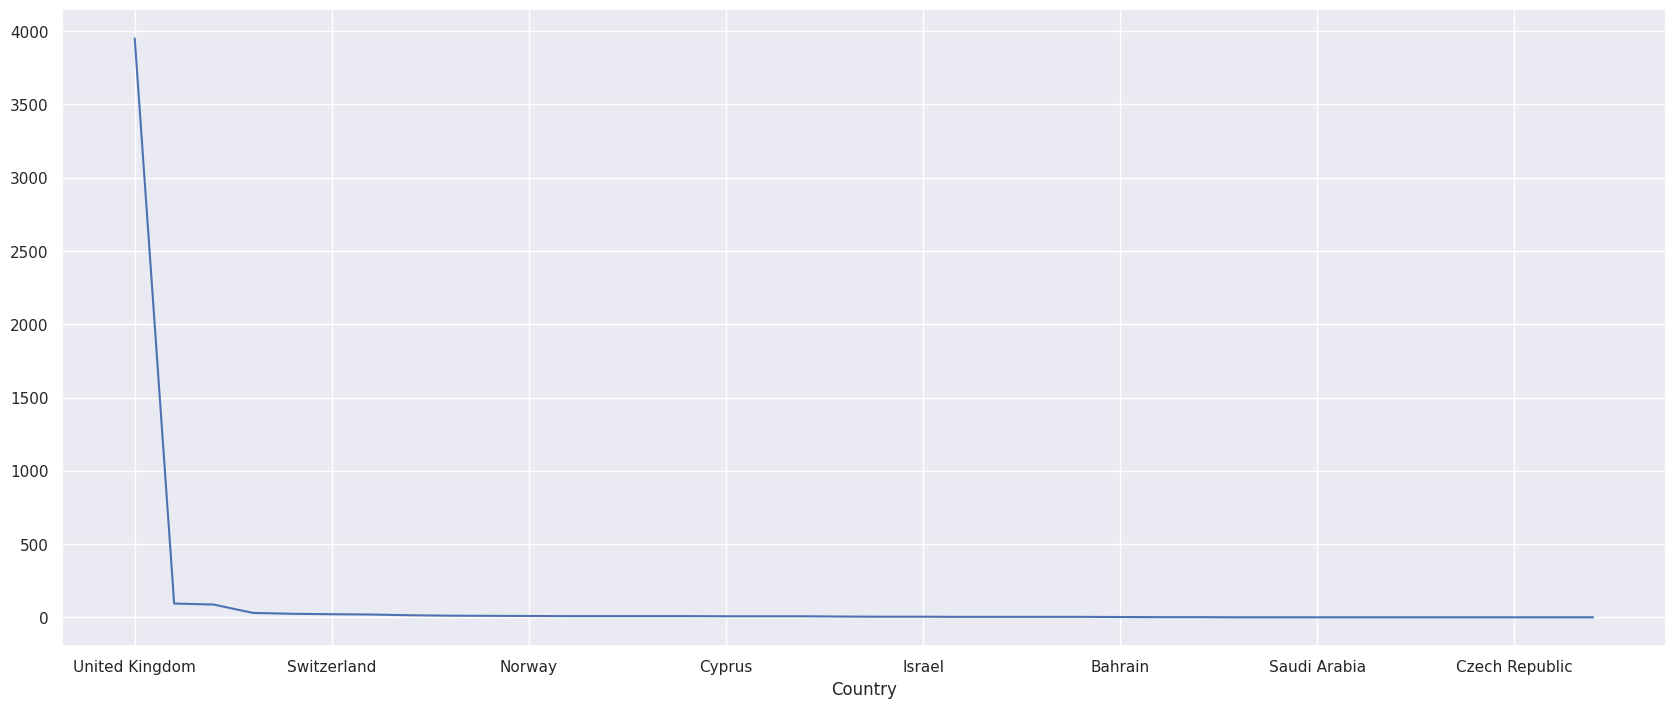

In [ ]:
data.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False).plot()

# InvoiceDate Vs #CustomeID

In [ ]:
data.groupby('InvoiceDate')['CustomerID'].nunique()

InvoiceDate
01-02-2011    66
01-03-2011    53
01-04-2011    69
01-05-2011    18
01-06-2011    56
              ..
31-03-2011    72
31-05-2011    54
31-07-2011    38
31-08-2011    73
31-10-2011    65
Name: CustomerID, Length: 305, dtype: int64

<Axes: xlabel='InvoiceDate'>

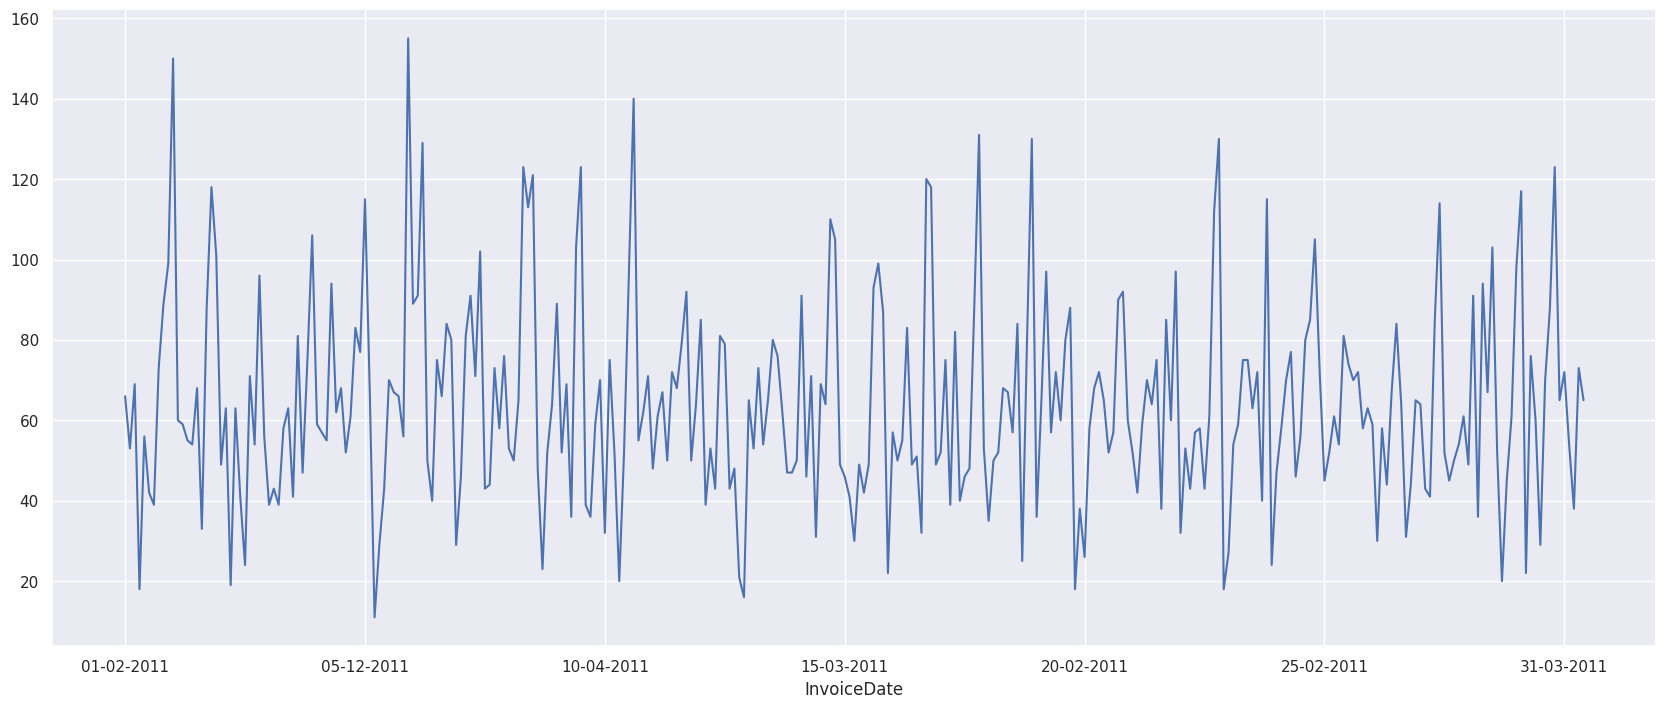

In [ ]:
data.groupby('InvoiceDate')['CustomerID'].nunique().plot()

# Stockcode Vs Sales

In [ ]:
data.groupby('StockCode')['Sales'].nunique().sort_values(ascending=False)

StockCode
DOT       688
M         407
22197     171
POST      167
22355     137
         ... 
35951       1
84509F      1
85231g      1
84509g      1
m           1
Name: Sales, Length: 4070, dtype: int64

<Axes: xlabel='StockCode'>

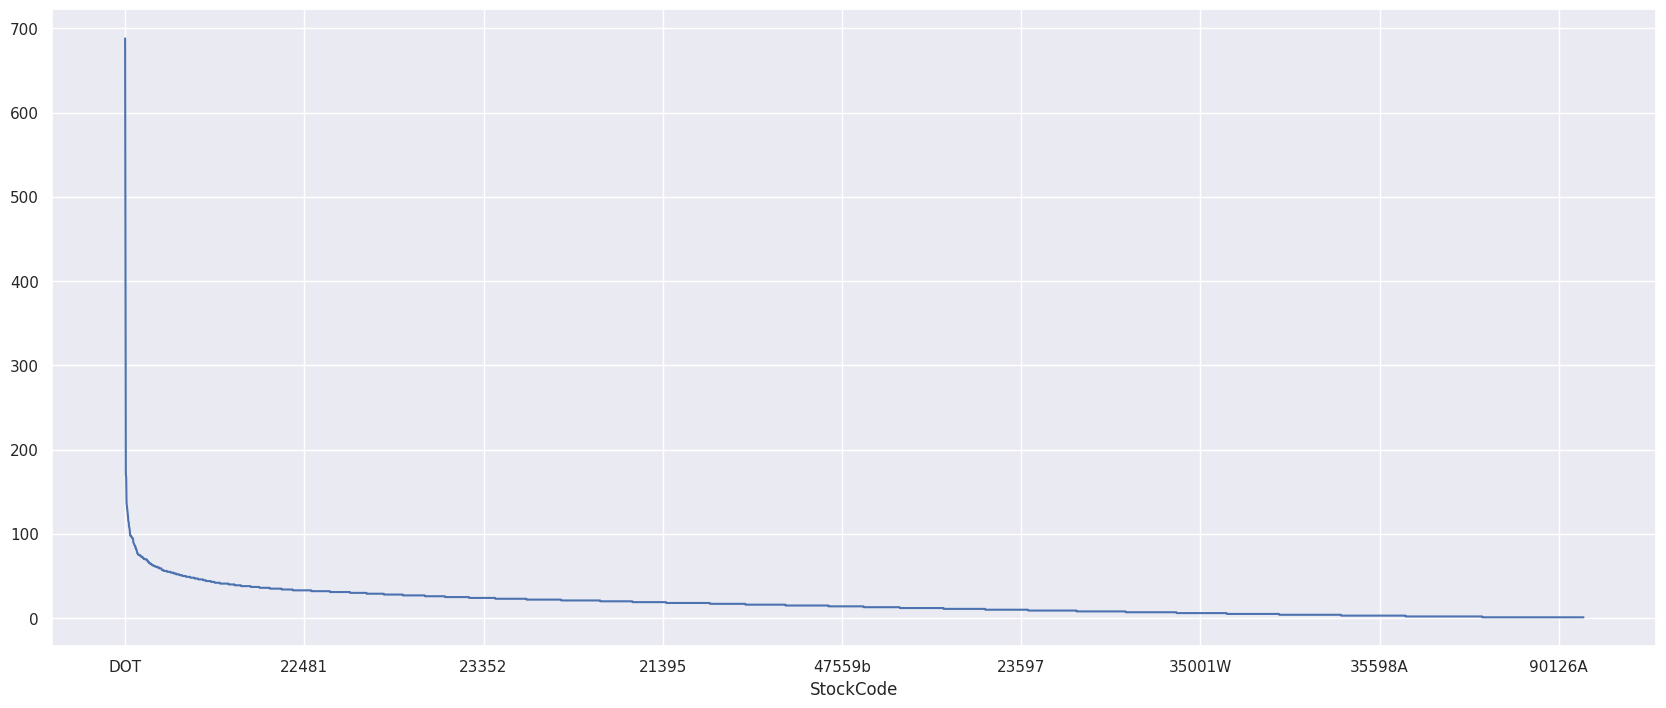

In [ ]:
data.groupby('StockCode')['Sales'].nunique().sort_values(ascending=False).plot()

# Feature Selection

In [ ]:
X = data[['Quantity','UnitPrice','CustomerID','Sales']]  #independent columns
X.dtypes

Quantity        int64
UnitPrice     float64
CustomerID      int64
Sales         float64
dtype: object

In [ ]:
X[X < 0] = 0
X

<ipython-input-22-8f01da76a71a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[X < 0] = 0
<ipython-input-22-8f01da76a71a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[X < 0] = 0


,Quantity,UnitPrice,CustomerID,Sales
0,6,2.55,17850,15.30
1,6,3.39,17850,20.34
2,8,2.75,17850,22.00
3,6,3.39,17850,20.34
4,6,3.39,17850,20.34
...,...,...,...,...
541904,12,0.85,12680,10.20
541905,6,2.10,12680,12.60
541906,4,4.15,12680,16.60
541907,4,4.15,12680,16.60


In [ ]:
y =X['Sales']
y[y < 0] = 0
y = y.astype(int)

<ipython-input-23-9f0f19cba9c5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y < 0] = 0


In [ ]:
'''Defines a variable 'bestfeatures' that uses the SelectKBest class from scikit-learn to extract the
top k features based on a scoring function,in this case, the chi-squared (chi2) test.'''
bestfeatures = SelectKBest(score_func=chi2,k="all")
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(4,'Score'))

        Specs         Score
3       Sales  1.968718e+09
0    Quantity  1.204590e+09
1   UnitPrice  1.381270e+08
2  CustomerID  2.402994e+06


In [ ]:
f_score=chi2(X,y)   #returns f score and p value
f_score

(array([1.20459048e+09, 1.38127003e+08, 2.40299409e+06, 1.96871814e+09]),
 array([0., 0., 0., 0.]))